In [88]:
import numpy as np
import Quaternion
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [51]:
colmap = '/home/rozenberszki/D_Project/wsnsl/Dataset/07f5b601ee/pose.txt'#
arkit = '/home/rozenberszki/D_Project/wsnsl/Dataset/07f5b601ee/traj.txt'

In [52]:
colmap = np.loadtxt(colmap).reshape(-1,4,4)
arkit = np.loadtxt(arkit).reshape(-1,4,4)

In [ ]:

import numpy as np

def transform_arkit_to_colmap(arkit_pose):
    # Extract rotation and translation from the ARKit pose
    arkit_rotation = arkit_pose[:3, :3]
    arkit_translation = arkit_pose[:3, 3]
    
    # Convert rotation from ARKit coordinate system to Colmap coordinate system
    colmap_rotation = arkit_rotation.T
    
    # Convert translation from ARKit coordinate system to Colmap coordinate system
    colmap_translation = -arkit_rotation.T @ arkit_translation
    
    # Create a 4x4 identity matrix for the Colmap pose
    colmap_pose = np.eye(4)
    
    # Set the rotation and translation values in the Colmap pose
    colmap_pose[:3, :3] = colmap_rotation
    colmap_pose[:3, 3] = colmap_translation
    
    return colmap_pose





In [89]:
def create_coordinate_frame(transform, size=0.1):
    frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=size)
    frame.transform(transform)
    return frame

# Convert COLMAP data to transformation matrices
colmap_poses = []
arkit_poses = []
for i in range(len(colmap)):

    
    colmap_poses.append(create_coordinate_frame(colmap[i]))
    arkit_poses.append(create_coordinate_frame(arkit[i*10]))

# Visualize the poses using Open3D
o3d.visualization.draw_geometries(colmap_poses + arkit_poses)

[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [103]:
arkit_transfromed = []
for i in range(500):
    R = colmap[i//10][:3,:3]
    arkit_transfromed.append(-R.T @ arkit[i][:3,3])

In [106]:
arkit_transfromed=np.array(arkit_transfromed)

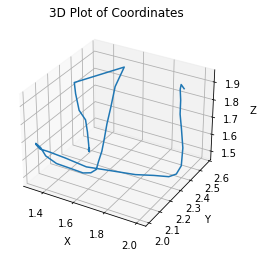

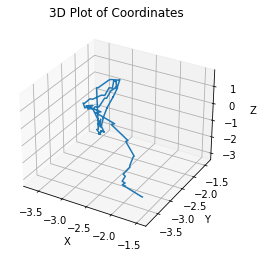

In [108]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y, z coordinates from colmap
x = colmap[:50, 0, 3]
y = colmap[:50, 1, 3]
z = colmap[:50, 2, 3]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(x, y, z)


# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of Coordinates')

# Show the plot
plt.show()
'''x2 = arkit_transfromed[:,0]
y2 = arkit_transfromed[:,1]
z2 = arkit_transfromed[:,2]'''
x2 = arkit[:500:10, 0, 3]
y2 = arkit[:500:10, 1, 3]
z2 = arkit[:500:10, 2, 3]
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(x2, y2, z2)



# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of Coordinates')

# Show the plot
plt.show()


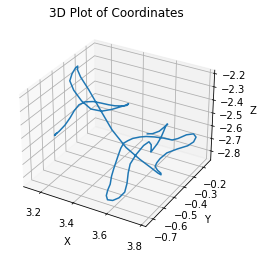

In [100]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x2 = arkit[:1000:10, 0, 3]
y2 = arkit[:1000:10, 1, 3]
z2 = arkit[:1000:10, 2, 3]
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(x2, y2, z2)



# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of Coordinates')

# Show the plot
plt.show()


In [84]:
transform_arkit_to_colmap(arkit[0]), colmap[0]

(array([[ 0.81875277, -0.50162464, -0.27931443,  3.1800714 ],
        [-0.57353574, -0.69214684, -0.43816608,  2.5539694 ],
        [ 0.02646829,  0.51894647, -0.8543969 , -0.5956651 ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 0.89634522,  0.20560163, -0.39280175,  1.39995203],
        [ 0.44235973, -0.47412001,  0.76126746,  2.37735946],
        [-0.02971733, -0.85611812, -0.51592509,  1.47652391],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]))

In [80]:
col = colmap[0] #np.linalg.inv(colmap[0])

In [83]:
np.linalg.inv(arkit[0]), col

(array([[ 0.81875285, -0.0264683 , -0.57353577, -4.08425257],
        [ 0.2793144 , -0.8543968 ,  0.43816601, -0.27811159],
        [-0.50162467, -0.5189465 , -0.69214685, -0.48163806],
        [ 0.        ,  0.        ,  0.        ,  1.00000024]]),
 array([[ 0.89634522,  0.20560163, -0.39280175,  1.39995203],
        [ 0.44235973, -0.47412001,  0.76126746,  2.37735946],
        [-0.02971733, -0.85611812, -0.51592509,  1.47652391],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]))

In [81]:
R_roll = [[-1, 0, 0],
          [0, -1, 0],
          [0, 0, 1]]
R = col[:3,:3]
T = col[:3,3]
n = np.eye(4)
n[:3,:3] = R.T @ R_roll
n[:3,3] = -R.T @ T

In [82]:
n, np.linalg.inv(arkit[0])

(array([[-0.89634522, -0.44235973, -0.02971733, -2.26261004],
        [-0.20560163,  0.47412001, -0.85611812,  2.10340015],
        [ 0.39280175, -0.76126746, -0.51592509, -0.49812704],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 0.81875285, -0.0264683 , -0.57353577, -4.08425257],
        [ 0.2793144 , -0.8543968 ,  0.43816601, -0.27811159],
        [-0.50162467, -0.5189465 , -0.69214685, -0.48163806],
        [ 0.        ,  0.        ,  0.        ,  1.00000024]]))

In [53]:
colmap_pose = transform_arkit_to_colmap(arkit[10])

In [55]:
colmap_pose, colmap[1]

(array([[ 0.81875277, -0.50162464, -0.27931443,  3.1800714 ],
        [-0.57353574, -0.69214684, -0.43816608,  2.5539694 ],
        [ 0.02646829,  0.51894647, -0.8543969 , -0.5956651 ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 0.90426923,  0.2109949 , -0.37118514,  1.39694242],
        [ 0.42644666, -0.48906413,  0.76089493,  2.37637735],
        [-0.02098818, -0.84634449, -0.53222374,  1.47317183],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]))

In [45]:
toArkit(colmap[0])

(array([ 1.39995203,  1.47652391, -2.37735946]),
 array([ 0.84946899, -0.124348  , -0.190696  , -0.475999  ]))

In [46]:
import numpy as np
from scipy.spatial.transform import Rotation as R

def pose_matrix_from_translation_quaternion(translation, quaternion):
    # Create a rotation matrix from the quaternion
    rotation_matrix = R.from_quat(quaternion).as_matrix()
    
    # Create a 4x4 identity matrix
    pose_matrix = np.eye(4)
    
    # Set the translation values in the pose matrix
    pose_matrix[:3, 3] = translation
    
    # Set the rotation values in the pose matrix
    pose_matrix[:3, :3] = rotation_matrix
    
    return pose_matrix


In [48]:
pose_matrix_from_translation_quaternion(*toArkit(colmap[0]))

array([[ 0.89634522, -0.39280175, -0.20560163,  1.39995203],
       [-0.02971733, -0.51592506,  0.8561181 ,  1.47652391],
       [-0.44235972, -0.76126744, -0.47411999, -2.37735946],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [49]:
arkit[0]

array([[ 0.81875277,  0.27931443, -0.50162464,  3.1800714 ],
       [-0.02646829, -0.8543969 , -0.51894647, -0.5956651 ],
       [-0.57353574,  0.43816608, -0.69214684, -2.5539694 ],
       [ 0.        ,  0.        ,  0.        ,  0.99999976]])

In [29]:
transform_arkit_to_colmap(arkit[0])

(array([ 3.1800714,  2.5539694, -0.5956651]),
 array([[ 0.81875277, -0.50162464, -0.27931443],
        [-0.57353574, -0.69214684, -0.43816608],
        [ 0.02646829,  0.51894647, -0.8543969 ]]))

In [30]:
colmap[0]

array([[ 0.89634522,  0.20560163, -0.39280175,  1.39995203],
       [ 0.44235973, -0.47412001,  0.76126746,  2.37735946],
       [-0.02971733, -0.85611812, -0.51592509,  1.47652391],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])